# ARIMA and SARIMA Forcasting


In [4]:
#ARIMA: Autoregressive Integrated Moving Average
#ARIMA is a powerful statistical method used for time series forecasting. It combines three different aspects: Autoregression (AR), Integration (I), and Moving Average (MA). The ARIMA model is denoted as ARIMA(p, d, q) where:
#p: The number of lag observations included in the model (Autoregressive part).
#d: The number of times that the raw observations are differenced to make the series stationary (Integrated part).
#q: The size of the moving average window (Moving Average part).

#The AR component specifies that the output variable depends linearly on its own previous values.
#Integrated part represents differencing of raw observations to make the time series stationary. Differencing involves subtracting the previous observation from the current observation.
#MA component involves modeling the error of the model as a linear combination of error terms from previous time steps.


In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')

# Display the first few rows to verify
print(df.head())


     Month  Perrin Freres monthly champagne sales millions ?64-?72
0  1964-01                                             2815.0     
1  1964-02                                             2672.0     
2  1964-03                                             2755.0     
3  1964-04                                             2721.0     
4  1964-05                                             2946.0     


In [17]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [18]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [19]:
# cleaning up the data
df.columns=['Month','Sales']
df.head()


,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [20]:
# Droping the last two rows
df.drop(106,axis=0,inplace=True)

In [21]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [22]:
df.drop(105,axis=0,inplace=True)

In [23]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [24]:
# Convert Month into Date time
df['Month']=pd.to_datetime(df['Month'])

In [25]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [26]:
df.set_index('Month',inplace=True)

In [27]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [28]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# Visualize the Time Series Data

<Axes: xlabel='Month'>

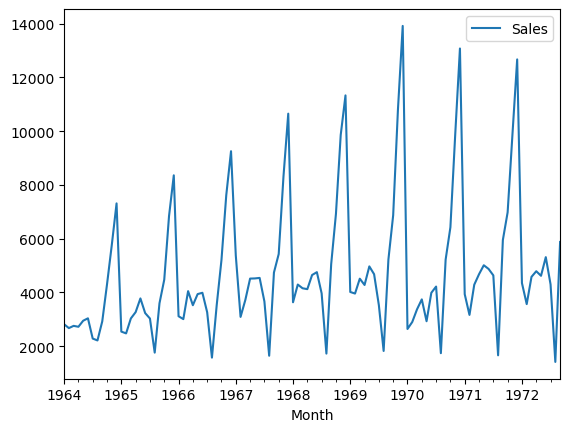

In [29]:
df.plot()

In [30]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [31]:
test_result=adfuller(df['Sales'])

In [32]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [33]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.833593056327623
p-value : 0.363915771660245
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Differencing

In [34]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [35]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [36]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [37]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [38]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

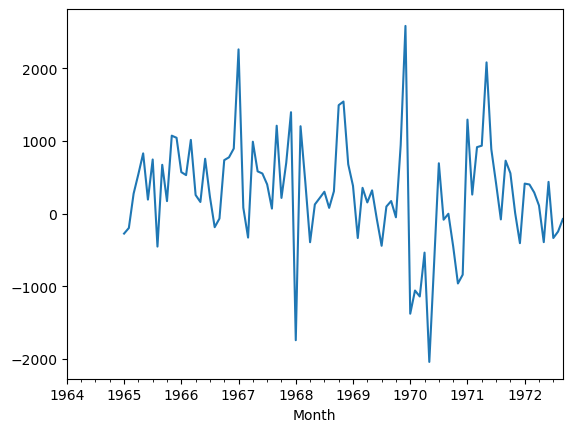

In [39]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model


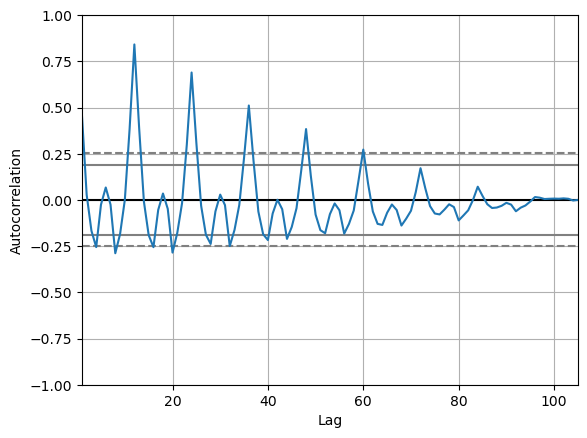

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

# Assuming 'df' is your DataFrame and 'Sales' is your column of interest
autocorrelation_plot(df['Sales'])
plt.show()


## Final Thoughts on Autocorrelation and Partial Autocorrelation
Identification of an AR model is often best done with the PAC
  

For an AR model, the theoretical PACF “shuts off” past the order of the mod
l. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that poi
t. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predict
  or.
Identification of an MA model is often best done with the ACF rather than the PAF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.
p,d,q p AR model lags d differencing q MA lags

In [41]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

Index(['Month', 'Perrin Freres monthly champagne sales millions ?64-?72'], dtype='object')


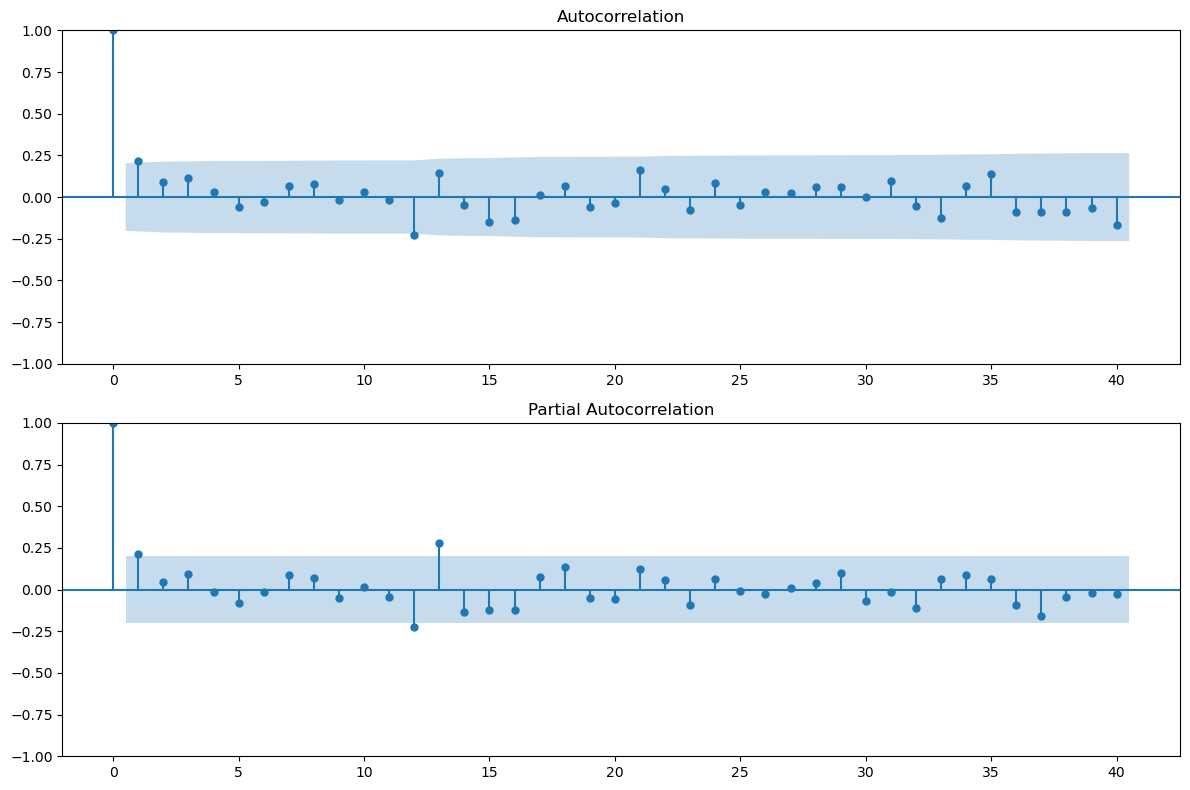

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load your dataset
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')

# Print the column names to check the correct one
print(df.columns)

# Assuming the column name is 'Sales' (adjust if necessary)
# Compute the seasonal difference (assuming seasonal period is 12 for monthly data)
df['Seasonal First Difference'] = df['Perrin Freres monthly champagne sales millions ?64-?72'] - df['Perrin Freres monthly champagne sales millions ?64-?72'].shift(12)

# Drop NaN values created by the shift
df.dropna(inplace=True)

# Create the figure
fig = plt.figure(figsize=(12, 8))

# Plot ACF
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(df['Seasonal First Difference'], lags=40, ax=ax1)

# Plot PACF
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'], lags=40, ax=ax2)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [43]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load your dataset
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')

# Print the column names to verify the correct name
print(df.columns)

# Use the actual column name instead of 'Sales'
# For example, if the column name is 'Champagne_Sales'
model = ARIMA(df['Perrin Freres monthly champagne sales millions ?64-?72'], order=(1, 1, 1))

# Fit the model
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())


Index(['Month', 'Perrin Freres monthly champagne sales millions ?64-?72'], dtype='object')
                                                 SARIMAX Results                                                  
Dep. Variable:     Perrin Freres monthly champagne sales millions ?64-?72   No. Observations:                  107
Model:                                                     ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                                                    Tue, 10 Sep 2024   AIC                           1911.627
Time:                                                            22:55:15   BIC                           1919.617
Sample:                                                                 0   HQIC                          1914.866
                                                                    - 107                                         
Covariance Type:                                                      opg                               

In [44]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                 SARIMAX Results                                                  
==================================================================================================================
Dep. Variable:     Perrin Freres monthly champagne sales millions ?64-?72   No. Observations:                  107
Model:                                                     ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                                                    Tue, 10 Sep 2024   AIC                           1911.627
Time:                                                            22:55:25   BIC                           1919.617
Sample:                                                                 0   HQIC                          1914.866
                                                                    - 107                                         
Covariance Type:                                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):                 3.15
Prob(Q):                              0.34   Prob(JB):                         0.21
Heteroskedasticity (H):               2.69   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Index(['Month', 'Perrin Freres monthly champagne sales millions ?64-?72'], dtype='object')


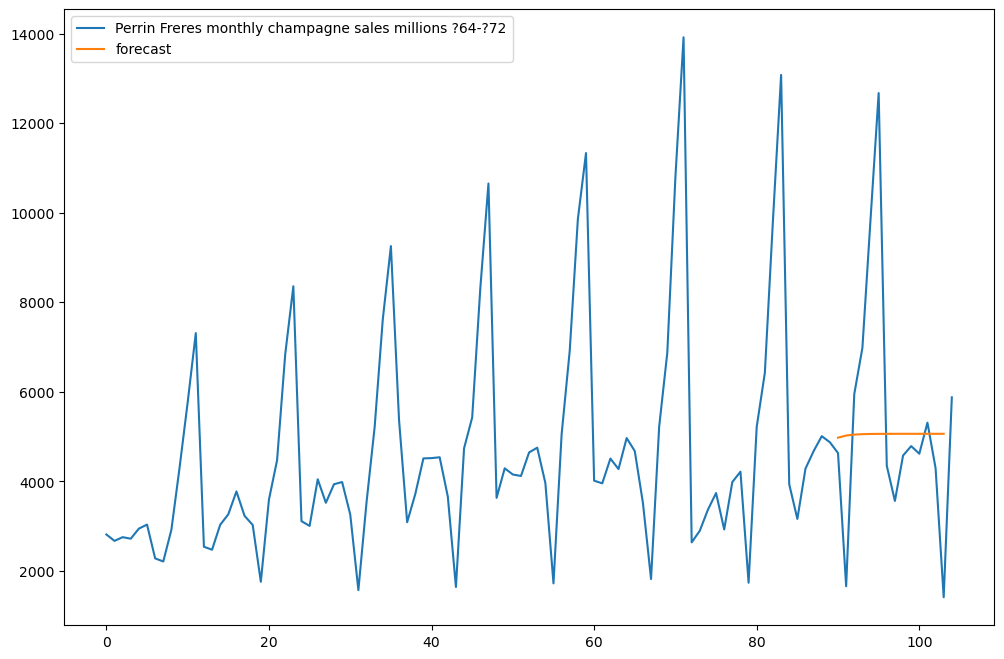

In [45]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load your dataset
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')

# Print the column names to verify the correct name
print(df.columns)

# Use the actual column name for 'Sales'
# Assuming the correct name is 'Champagne_Sales'
model = ARIMA(df['Perrin Freres monthly champagne sales millions ?64-?72'], order=(1, 1, 1))
model_fit = model.fit()

# Generate forecast
df['forecast'] = model_fit.predict(start=90, end=103, dynamic=True)

# Plot the original and forecasted values
df[['Perrin Freres monthly champagne sales millions ?64-?72', 'forecast']].plot(figsize=(12, 8))

# Show the plot
plt.show()


In [46]:
import statsmodels.api as sm

In [47]:
model=sm.tsa.statespace.SARIMAX(df['Perrin Freres monthly champagne sales millions ?64-?72'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

<Axes: >

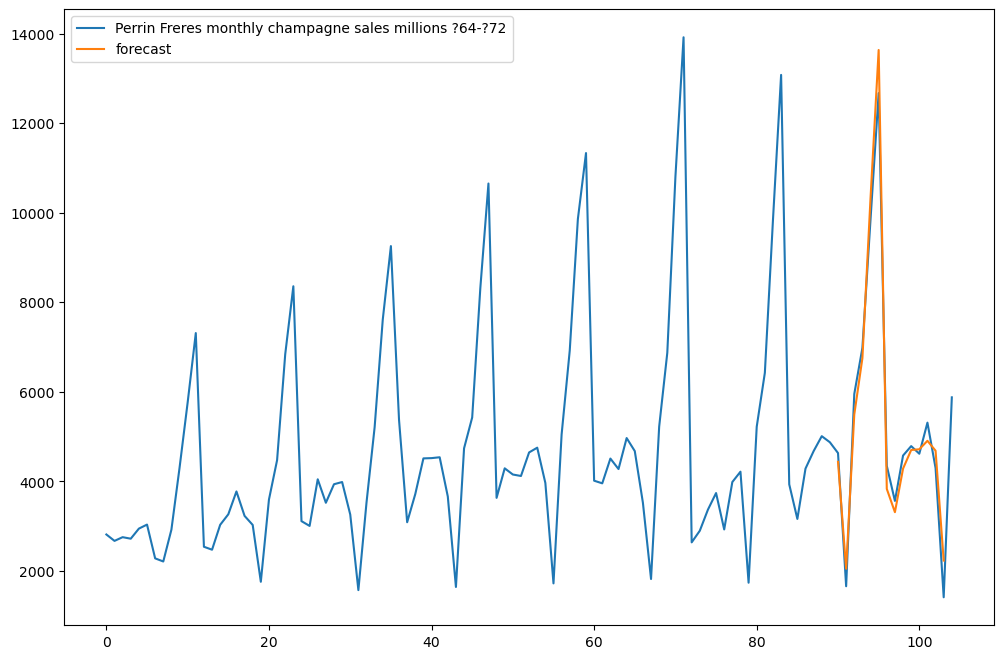

In [48]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Perrin Freres monthly champagne sales millions ?64-?72','forecast']].plot(figsize=(12,8))

In [49]:
print(df.columns)

Index(['Month', 'Perrin Freres monthly champagne sales millions ?64-?72',
       'forecast'],
      dtype='object')


In [50]:
# Inspect the 'Month' column to check for non-date entries
print(df['Month'].unique())  # This will display unique values in the 'Month' column

['1964-01' '1964-02' '1964-03' '1964-04' '1964-05' '1964-06' '1964-07'
 '1964-08' '1964-09' '1964-10' '1964-11' '1964-12' '1965-01' '1965-02'
 '1965-03' '1965-04' '1965-05' '1965-06' '1965-07' '1965-08' '1965-09'
 '1965-10' '1965-11' '1965-12' '1966-01' '1966-02' '1966-03' '1966-04'
 '1966-05' '1966-06' '1966-07' '1966-08' '1966-09' '1966-10' '1966-11'
 '1966-12' '1967-01' '1967-02' '1967-03' '1967-04' '1967-05' '1967-06'
 '1967-07' '1967-08' '1967-09' '1967-10' '1967-11' '1967-12' '1968-01'
 '1968-02' '1968-03' '1968-04' '1968-05' '1968-06' '1968-07' '1968-08'
 '1968-09' '1968-10' '1968-11' '1968-12' '1969-01' '1969-02' '1969-03'
 '1969-04' '1969-05' '1969-06' '1969-07' '1969-08' '1969-09' '1969-10'
 '1969-11' '1969-12' '1970-01' '1970-02' '1970-03' '1970-04' '1970-05'
 '1970-06' '1970-07' '1970-08' '1970-09' '1970-10' '1970-11' '1970-12'
 '1971-01' '1971-02' '1971-03' '1971-04' '1971-05' '1971-06' '1971-07'
 '1971-08' '1971-09' '1971-10' '1971-11' '1971-12' '1972-01' '1972-02'
 '1972

In [51]:
# Optional: If there are unwanted entries (e.g., text), you can filter them out
# Assuming non-date entries are strings, filter them out
df = df[df['Month'].str.contains(r'^\d{4}-\d{2}', na=False)]  # Keeps rows where 'Month' follows 'YYYY-MM' format

In [52]:
# Now, try converting the 'Month' column to datetime format again
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

In [53]:
# Set 'Month' as index
df.set_index('Month', inplace=True)

In [55]:
import pandas as pd
from pandas.tseries.offsets import DateOffset

# Assuming your DataFrame 'df' already has a DateTime index set
# Generate future dates (for the next 24 months)
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0, 24)]

# Print the future dates
print(future_dates)


[Timestamp('1972-09-01 00:00:00'), Timestamp('1972-10-01 00:00:00'), Timestamp('1972-11-01 00:00:00'), Timestamp('1972-12-01 00:00:00'), Timestamp('1973-01-01 00:00:00'), Timestamp('1973-02-01 00:00:00'), Timestamp('1973-03-01 00:00:00'), Timestamp('1973-04-01 00:00:00'), Timestamp('1973-05-01 00:00:00'), Timestamp('1973-06-01 00:00:00'), Timestamp('1973-07-01 00:00:00'), Timestamp('1973-08-01 00:00:00'), Timestamp('1973-09-01 00:00:00'), Timestamp('1973-10-01 00:00:00'), Timestamp('1973-11-01 00:00:00'), Timestamp('1973-12-01 00:00:00'), Timestamp('1974-01-01 00:00:00'), Timestamp('1974-02-01 00:00:00'), Timestamp('1974-03-01 00:00:00'), Timestamp('1974-04-01 00:00:00'), Timestamp('1974-05-01 00:00:00'), Timestamp('1974-06-01 00:00:00'), Timestamp('1974-07-01 00:00:00'), Timestamp('1974-08-01 00:00:00')]


In [56]:
# Print the future dates
print(future_dates)

[Timestamp('1972-09-01 00:00:00'), Timestamp('1972-10-01 00:00:00'), Timestamp('1972-11-01 00:00:00'), Timestamp('1972-12-01 00:00:00'), Timestamp('1973-01-01 00:00:00'), Timestamp('1973-02-01 00:00:00'), Timestamp('1973-03-01 00:00:00'), Timestamp('1973-04-01 00:00:00'), Timestamp('1973-05-01 00:00:00'), Timestamp('1973-06-01 00:00:00'), Timestamp('1973-07-01 00:00:00'), Timestamp('1973-08-01 00:00:00'), Timestamp('1973-09-01 00:00:00'), Timestamp('1973-10-01 00:00:00'), Timestamp('1973-11-01 00:00:00'), Timestamp('1973-12-01 00:00:00'), Timestamp('1974-01-01 00:00:00'), Timestamp('1974-02-01 00:00:00'), Timestamp('1974-03-01 00:00:00'), Timestamp('1974-04-01 00:00:00'), Timestamp('1974-05-01 00:00:00'), Timestamp('1974-06-01 00:00:00'), Timestamp('1974-07-01 00:00:00'), Timestamp('1974-08-01 00:00:00')]


In [57]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [58]:
future_datest_df.tail()

,Perrin Freres monthly champagne sales millions ?64-?72,forecast
1974-04-01,NaN,NaN
1974-05-01,NaN,NaN
1974-06-01,NaN,NaN
1974-07-01,NaN,NaN
1974-08-01,NaN,NaN


In [59]:
future_df=pd.concat([df,future_datest_df])

C:\Users\admin\AppData\Local\Temp\ipykernel_4692\1723908026.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])


In [61]:
print(future_df.columns)

Index(['Perrin Freres monthly champagne sales millions ?64-?72', 'forecast'], dtype='object')


In [68]:
future_df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?7': 'Sales'}, inplace=True)


In [69]:
print(future_df.columns)

Index(['Perrin Freres monthly champagne sales millions ?64-?72', 'forecast'], dtype='object')


<Axes: >

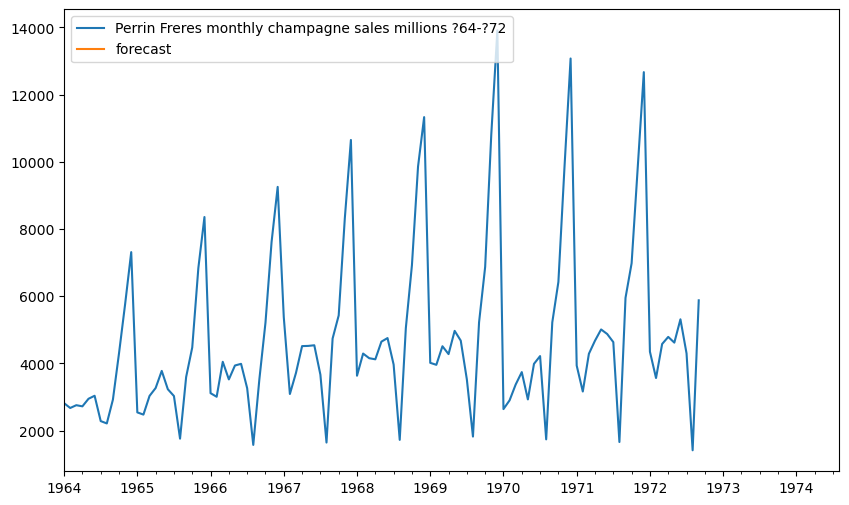

In [71]:
future_df['forecast'] = results.predict(start = 104, end = 130, dynamic= True)  
future_df[['Perrin Freres monthly champagne sales millions ?64-?72', 'forecast']].plot(figsize=(10, 6))

In [72]:
print(future_df[['forecast']].head())  # Check if forecast values are being generated

            forecast
1964-01-01       NaN
1964-02-01       NaN
1964-03-01       NaN
1964-04-01       NaN
1964-05-01       NaN


In [73]:
future_df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72': 'Sales'}, inplace=True)


<Axes: >

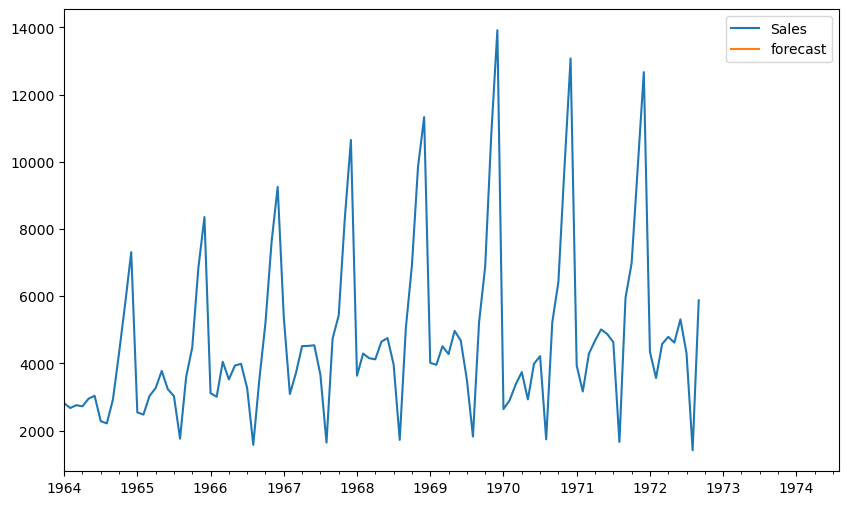

In [74]:
future_df[['Sales', 'forecast']].plot(figsize=(10, 6))


<Axes: >

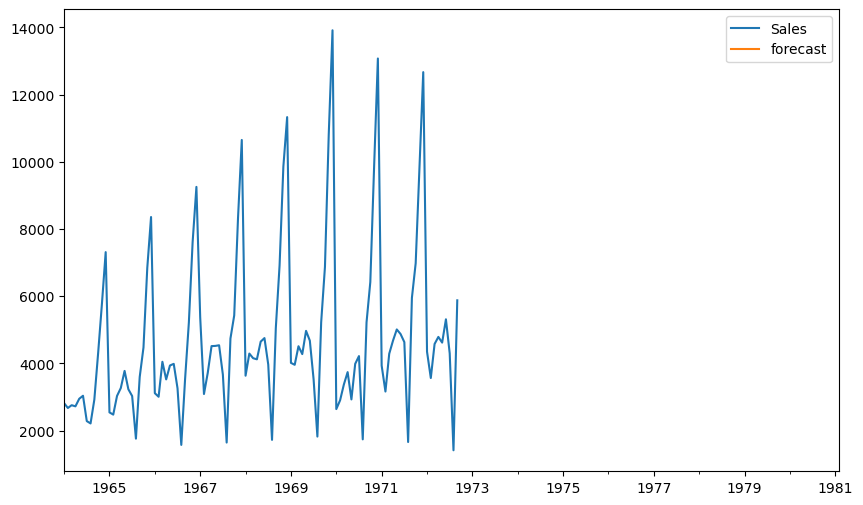

In [78]:
# Generate future dates
from pandas.tseries.offsets import DateOffset
future_dates = [future_df.index[-1] + DateOffset(months=x) for x in range(1, 27)]  # 24 months of forecast

# Create a new DataFrame for future dates
future_df_new = pd.DataFrame(index=future_dates)

# Concatenate the original and future DataFrames
future_df = pd.concat([future_df, future_df_new])

# Assign forecast values
future_df['forecast'] = results.predict(start=104, end=130, dynamic=True)

# Plot the results
future_df[['Sales', 'forecast']].plot(figsize=(10, 6))


In [79]:
# Generate future dates
from pandas.tseries.offsets import DateOffset

# Step 1: Check the last date in the original DataFrame
print("Last date in current data:", future_df.index[-1])

Last date in current data: 1981-02-01 00:00:00


In [80]:
# Generate future dates for the next 24 months
future_dates = [future_df.index[-1] + DateOffset(months=x) for x in range(1, 27)]

In [81]:
# Step 2: Create a new DataFrame for future dates
future_df_new = pd.DataFrame(index=future_dates)

In [82]:
# Step 3: Concatenate the original and future DataFrames
future_df = pd.concat([future_df, future_df_new])

In [83]:
# Step 4: Confirm that the future dates were added successfully
print("Updated DataFrame with future dates:")
print(future_df.tail(30))  # Print the last 30 rows to ensure future dates were added

Updated DataFrame with future dates:
            Sales  forecast
1980-11-01    NaN       NaN
1980-12-01    NaN       NaN
1981-01-01    NaN       NaN
1981-02-01    NaN       NaN
1981-03-01    NaN       NaN
1981-04-01    NaN       NaN
1981-05-01    NaN       NaN
1981-06-01    NaN       NaN
1981-07-01    NaN       NaN
1981-08-01    NaN       NaN
1981-09-01    NaN       NaN
1981-10-01    NaN       NaN
1981-11-01    NaN       NaN
1981-12-01    NaN       NaN
1982-01-01    NaN       NaN
1982-02-01    NaN       NaN
1982-03-01    NaN       NaN
1982-04-01    NaN       NaN
1982-05-01    NaN       NaN
1982-06-01    NaN       NaN
1982-07-01    NaN       NaN
1982-08-01    NaN       NaN
1982-09-01    NaN       NaN
1982-10-01    NaN       NaN
1982-11-01    NaN       NaN
1982-12-01    NaN       NaN
1983-01-01    NaN       NaN
1983-02-01    NaN       NaN
1983-03-01    NaN       NaN
1983-04-01    NaN       NaN


In [84]:
# Step 5: Assign forecast values
future_df['forecast'] = results.predict(start=104, end=120, dynamic=True)

In [85]:
# Step 6: Check for NaN in forecast values
print("Forecast values:")
print(future_df[['forecast']].tail(30))


Forecast values:
            forecast
1980-11-01       NaN
1980-12-01       NaN
1981-01-01       NaN
1981-02-01       NaN
1981-03-01       NaN
1981-04-01       NaN
1981-05-01       NaN
1981-06-01       NaN
1981-07-01       NaN
1981-08-01       NaN
1981-09-01       NaN
1981-10-01       NaN
1981-11-01       NaN
1981-12-01       NaN
1982-01-01       NaN
1982-02-01       NaN
1982-03-01       NaN
1982-04-01       NaN
1982-05-01       NaN
1982-06-01       NaN
1982-07-01       NaN
1982-08-01       NaN
1982-09-01       NaN
1982-10-01       NaN
1982-11-01       NaN
1982-12-01       NaN
1983-01-01       NaN
1983-02-01       NaN
1983-03-01       NaN
1983-04-01       NaN


<Axes: >

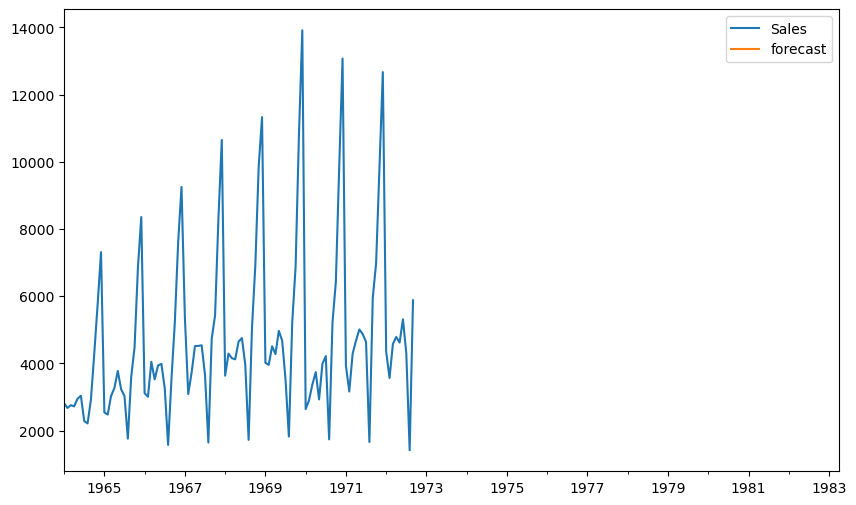

In [86]:
# Step 7: Plot the results
future_df[['Sales', 'forecast']].plot(figsize=(10, 6))

In [87]:
model = SARIMAX(df['Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

NameError: name 'SARIMAX' is not defined

In [88]:
# Importing SARIMAX from statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [90]:
# Building and fitting the model
model = SARIMAX(df['Perrin Freres monthly champagne sales millions ?64-?72'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()


C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [91]:
# Print model summary to verify fitting
print(results.summary())

                                                 SARIMAX Results                                                  
Dep. Variable:     Perrin Freres monthly champagne sales millions ?64-?72   No. Observations:                  105
Model:                                     SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                                                    Tue, 10 Sep 2024   AIC                           1486.804
Time:                                                            23:39:01   BIC                           1499.413
Sample:                                                        01-01-1964   HQIC                          1491.893
                                                             - 09-01-1972                                         
Covariance Type:                                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-

In [93]:
# Check the last few rows to ensure future dates have been appended
print(future_df.tail(10))  # This will show the last few dates


            Sales  forecast
1982-07-01    NaN       NaN
1982-08-01    NaN       NaN
1982-09-01    NaN       NaN
1982-10-01    NaN       NaN
1982-11-01    NaN       NaN
1982-12-01    NaN       NaN
1983-01-01    NaN       NaN
1983-02-01    NaN       NaN
1983-03-01    NaN       NaN
1983-04-01    NaN       NaN


In [94]:
# Check the forecast values
print(future_df[['forecast']].tail(30))  # This will show the forecasted values


            forecast
1980-11-01       NaN
1980-12-01       NaN
1981-01-01       NaN
1981-02-01       NaN
1981-03-01       NaN
1981-04-01       NaN
1981-05-01       NaN
1981-06-01       NaN
1981-07-01       NaN
1981-08-01       NaN
1981-09-01       NaN
1981-10-01       NaN
1981-11-01       NaN
1981-12-01       NaN
1982-01-01       NaN
1982-02-01       NaN
1982-03-01       NaN
1982-04-01       NaN
1982-05-01       NaN
1982-06-01       NaN
1982-07-01       NaN
1982-08-01       NaN
1982-09-01       NaN
1982-10-01       NaN
1982-11-01       NaN
1982-12-01       NaN
1983-01-01       NaN
1983-02-01       NaN
1983-03-01       NaN
1983-04-01       NaN


In [97]:
future_df['forecast'] = results.predict(start=104, end=120, dynamic=True)


In [98]:
print(future_df.columns)  # This will list all column names

Index(['Sales', 'forecast'], dtype='object')


<Axes: >

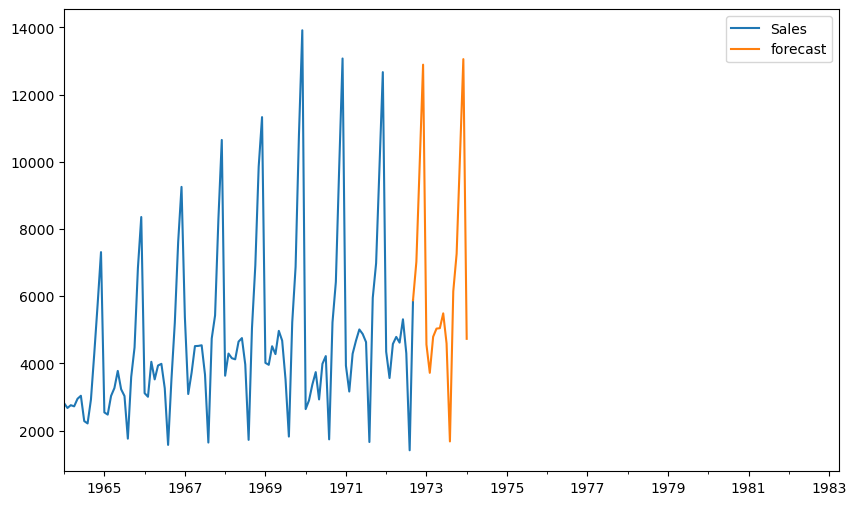

In [99]:
# Ensure both 'Sales' and 'forecast' columns exist in the dataframe
future_df[['Sales', 'forecast']].plot(figsize=(10, 6))

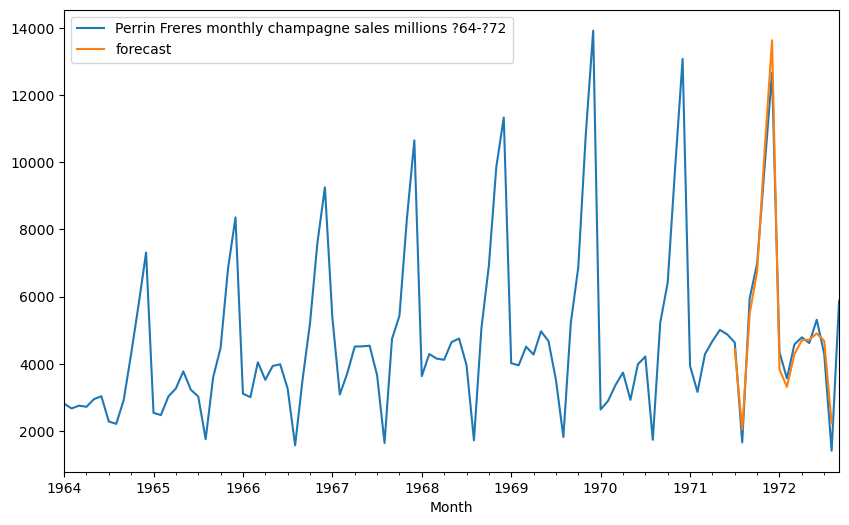

In [107]:
import matplotlib.pyplot as plt

# Example DataFrame and plot
df[['Perrin Freres monthly champagne sales millions ?64-?72', 'forecast']].plot(figsize=(10, 6))

# Display the plot
plt.show()


In [108]:
%matplotlib inline


In [109]:
plt.savefig('plot.png')


<Figure size 640x480 with 0 Axes>

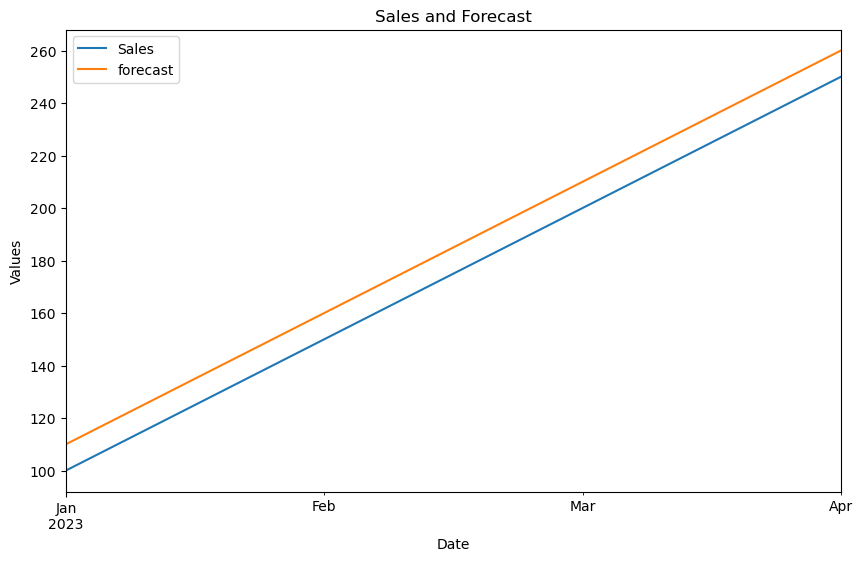

In [110]:
import matplotlib.pyplot as plt

# Example DataFrame
df = pd.DataFrame({
    'Sales': [100, 150, 200, 250],
    'forecast': [110, 160, 210, 260]
}, index=pd.date_range(start='2023-01-01', periods=4, freq='M'))

# Plotting
df.plot(figsize=(10, 6))
plt.title('Sales and Forecast')
plt.xlabel('Date')
plt.ylabel('Values')

# Display the plot
plt.show()


In [112]:
# Display the plot
import matplotlib.pyplot as plt
plt.show()